# Derivatives

The derivative of a function is the rate of change or that function. For instance, if a function described the speed of a car, the derivative would describe the acceleration or deceleration.

In practice, this translates to the tangent of the function:

![](derivative_plot.png)

For [differentiable functions](), you have derivatives everywhere, which look like this:



Note that not all continuous functions are [differentiable](https://math.stackexchange.com/questions/386967/necessary-and-sufficient-conditions-for-differentiability), but a function must be continuous to be differentiable (recall the definition of continuous functions from module 1).

You could use [Wolfram Alpha](https://www.wolframalpha.com/) to calculate derivatives of function, but within python there's Sympy:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

x, y, z = sy.symbols('x y z')

sy.init_printing(use_unicode=True)

sy.diff(sy.cos(x), x)

In [3]:
sy.diff(sy.exp(x**2), x)

In [4]:
expr = sy.exp(x*y*z)

sy.diff(expr, x)

**Partial derivatives**

In a function of many inputs, we can take derivatives with respect to one of the inputs:

In [6]:
sy.diff(expr, y)

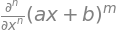

In [6]:
m, n, a, b = sy.symbols('m n a b')

expr = (a*x + b)**m

expr.diff((x, n))

**2nd derivatives** are the rate of change of the rate of change.

In a moving car, velocity would be the function, acceleration the derivative, and "jerk" would be the second derivative.

In [5]:
sy.diff(expr, x, x)

# Gradients

In a function taking in a vector, the **gradient** is the vector of partial derivatives of all the inputs of a function.

Here it is represented on a 3d field of a $f(x_1, X_2) = y$ function:

![](gradient_field.png)

# Minimization

Take a differentiable function and a starting point. The derivative will always point us "where to go" to find a minimum or maximum from where you are. This is called gradient descent or "hill climbing".

From now on we'll only talk about minimizing functions, because $min(-f(x)) = max(f(x))$.

Remember, a minimum has a derivative of 0 (the tangent gradient is flat at that point by definition).

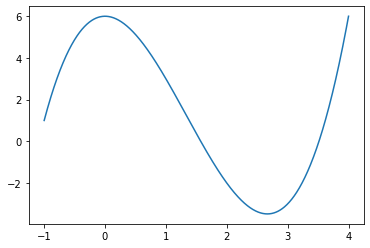

In [11]:
f_x = lambda x: (x**3)-4*(x**2)+6  

x = np.linspace(-1,4,1000)

#Plot the curve
plt.plot(x, f_x(x))
plt.show()

In [12]:
f_x_derivative = lambda x: 3*(x**2)-8*x

Let's write functions to plot gradient descent and also calulate minimum using gradient descent algorithm.We will be passing x_start(starting value of x), iterations, learning rate as parameters.

In [13]:
def plot_gradient(x, y, x_vis, y_vis):
    plt.subplot(1,2,2)
    plt.scatter(x_vis, y_vis, c = "b")
    plt.plot(x, f_x(x), c = "r")
    plt.title("Gradient Descent")
    plt.show()

    plt.subplot(1,2,1)
    plt.scatter(x_vis, y_vis, c = "b")
    plt.plot(x,f_x(x), c = "r")
    plt.xlim([2.0,3.0])
    plt.title("Zoomed in Figure")
    plt.show()
    
def gradient_iteration(x_start, iterations, learning_rate):
    
    # These x and y value lists will be used later for visualisation.
    x_grad = [x_start]
    y_grad = [f_x(x_start)]
    # Keep looping until number of iterations
    for i in range(iterations):
        
        # Get the Slope value from the derivative function for x_start
        # Since we need negative descent (towards minimum), we use '-' of derivative
        x_start_derivative = - f_x_derivative(x_start)
        
        # calculate x_start by adding the previous value to 
        # the product of the derivative and the learning rate calculated above.
        x_start += (learning_rate * x_start_derivative)        
        
        x_grad.append(x_start)
        y_grad.append(f_x(x_start))

    print ("Local minimum occurs at: {:.2f}".format(x_start))
    print ("Number of steps: ",len(x_grad)-1)
    plot_gradient(x, f_x(x) ,x_grad, y_grad)

Now , let's run gradient_iteration function with <br>
x_start = 0.5, iterations = 1000, learning rate = 0.05

Local minimum occurs at: 2.67
Number of steps:  1000


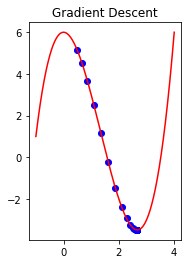

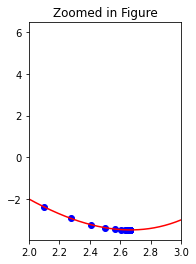

In [14]:
gradient_iteration(0.5, 1000, 0.05)